In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
data = pd.read_csv('food_coded.csv')

In [58]:
#描述性統計- data describe
def describe(df):
    df_des=df.describe(include='all',datetime_is_numeric=True)
    return df_des.round(2)
data_des = describe(data)
data_des

,ID,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
count,125.00,121.00,125.00,125.00,125.00,106.00,124.00,125.00,124,124,...,124.00,123.00,125.00,124.00,125.00,104,125.00,125.00,125.00,122.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124,107,...,NaN,NaN,NaN,NaN,NaN,67,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chocolate, ice cream, cookie dough",boredom,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN
mean,63.00,3.42,1.39,1.11,577.32,3.03,505.24,1.75,NaN,NaN,...,1.22,1.39,3.34,947.58,555.04,NaN,4.01,1.51,1073.40,159.05
std,36.23,0.39,0.49,0.32,131.21,0.64,230.84,0.43,NaN,NaN,...,0.41,0.49,1.44,202.09,152.37,NaN,1.08,0.50,248.67,32.38
min,1.00,2.20,1.00,1.00,265.00,2.00,315.00,1.00,NaN,NaN,...,1.00,1.00,1.00,580.00,345.00,NaN,1.00,1.00,575.00,100.00
25%,32.00,3.20,1.00,1.00,430.00,3.00,420.00,2.00,NaN,NaN,...,1.00,1.00,2.00,725.00,500.00,NaN,3.00,1.00,900.00,135.00
50%,63.00,3.50,1.00,1.00,610.00,3.00,420.00,2.00,NaN,NaN,...,1.00,1.00,3.00,940.00,500.00,NaN,4.00,2.00,900.00,155.00
75%,94.00,3.70,2.00,1.00,720.00,3.00,420.00,2.00,NaN,NaN,...,1.00,2.00,5.00,1165.00,690.00,NaN,5.00,2.00,1315.00,180.00


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            125 non-null    int64  
 1   GPA                           121 non-null    float64
 2   Gender                        125 non-null    int64  
 3   breakfast                     125 non-null    int64  
 4   calories_chicken              125 non-null    int64  
 5   calories_day                  106 non-null    float64
 6   calories_scone                124 non-null    float64
 7   coffee                        125 non-null    int64  
 8   comfort_food                  124 non-null    object 
 9   comfort_food_reasons          124 non-null    object 
 10  comfort_food_reasons_coded    106 non-null    float64
 11  cook                          122 non-null    float64
 12  comfort_food_reasons_coded.1  125 non-null    int64  
 13  cuisi

In [176]:
def read_dataset(fname):
    # 指定索引
    data = pd.read_csv(fname, index_col=0) 
    data = data.reset_index()
    # 取喜好類型
    data = data[['sports','Gender','calories_day','cook','eating_out','fav_food','fruit_day','nutritional_check','parents_cook','pay_meal_out','veggies_day','vitamins']]
    # 處理遺缺值
    data = data.dropna()
    # 指定索引
    data = data.reset_index(drop=True)
    return data

train = read_dataset('food_coded.csv')

In [177]:
train

,sports,Gender,calories_day,cook,eating_out,fav_food,fruit_day,nutritional_check,parents_cook,pay_meal_out,veggies_day,vitamins
0,1.0,1,3.0,3.0,2,1.0,4,4,1,4,4,2
1,2.0,1,4.0,1.0,2,3.0,5,4,1,3,5,1
2,2.0,1,3.0,2.0,2,1.0,4,2,1,2,3,1
3,1.0,1,2.0,1.0,2,3.0,4,3,1,4,4,2
4,2.0,1,3.0,3.0,1,3.0,2,1,2,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,2,4.0,4.0,2,3.0,5,1,1,5,2,2
97,2.0,1,3.0,3.0,2,1.0,5,2,3,4,5,2
98,1.0,2,3.0,2.0,2,3.0,5,2,1,3,5,2
99,1.0,1,4.0,3.0,2,1.0,5,5,1,4,5,1


In [178]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sports             101 non-null    float64
 1   Gender             101 non-null    int64  
 2   calories_day       101 non-null    float64
 3   cook               101 non-null    float64
 4   eating_out         101 non-null    int64  
 5   fav_food           101 non-null    float64
 6   fruit_day          101 non-null    int64  
 7   nutritional_check  101 non-null    int64  
 8   parents_cook       101 non-null    int64  
 9   pay_meal_out       101 non-null    int64  
 10  veggies_day        101 non-null    int64  
 11  vitamins           101 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 9.6 KB


In [179]:
#查看體重欄位與值的狀況
# train['weight']

In [180]:
#刪除有文字的那兩筆(row列)資料
# train = train.drop([1,2])

In [181]:
train

,sports,Gender,calories_day,cook,eating_out,fav_food,fruit_day,nutritional_check,parents_cook,pay_meal_out,veggies_day,vitamins
0,1.0,1,3.0,3.0,2,1.0,4,4,1,4,4,2
1,2.0,1,4.0,1.0,2,3.0,5,4,1,3,5,1
2,2.0,1,3.0,2.0,2,1.0,4,2,1,2,3,1
3,1.0,1,2.0,1.0,2,3.0,4,3,1,4,4,2
4,2.0,1,3.0,3.0,1,3.0,2,1,2,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,2,4.0,4.0,2,3.0,5,1,1,5,2,2
97,2.0,1,3.0,3.0,2,1.0,5,2,3,4,5,2
98,1.0,2,3.0,2.0,2,3.0,5,2,1,3,5,2
99,1.0,1,4.0,3.0,2,1.0,5,5,1,4,5,1


In [182]:
#重新排序
train = train.reset_index(drop=True)

In [183]:
# train['weight']=train['weight'].astype(int)
# train

In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sports             101 non-null    float64
 1   Gender             101 non-null    int64  
 2   calories_day       101 non-null    float64
 3   cook               101 non-null    float64
 4   eating_out         101 non-null    int64  
 5   fav_food           101 non-null    float64
 6   fruit_day          101 non-null    int64  
 7   nutritional_check  101 non-null    int64  
 8   parents_cook       101 non-null    int64  
 9   pay_meal_out       101 non-null    int64  
 10  veggies_day        101 non-null    int64  
 11  vitamins           101 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 9.6 KB


In [185]:
# def kg():
#     train['weight'] = train['weight']*0.45359237  # pounds to kg
#     return
# kg()
train

,sports,Gender,calories_day,cook,eating_out,fav_food,fruit_day,nutritional_check,parents_cook,pay_meal_out,veggies_day,vitamins
0,1.0,1,3.0,3.0,2,1.0,4,4,1,4,4,2
1,2.0,1,4.0,1.0,2,3.0,5,4,1,3,5,1
2,2.0,1,3.0,2.0,2,1.0,4,2,1,2,3,1
3,1.0,1,2.0,1.0,2,3.0,4,3,1,4,4,2
4,2.0,1,3.0,3.0,1,3.0,2,1,2,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,2,4.0,4.0,2,3.0,5,1,1,5,2,2
97,2.0,1,3.0,3.0,2,1.0,5,2,3,4,5,2
98,1.0,2,3.0,2.0,2,3.0,5,2,1,3,5,2
99,1.0,1,4.0,3.0,2,1.0,5,5,1,4,5,1


In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sports             101 non-null    float64
 1   Gender             101 non-null    int64  
 2   calories_day       101 non-null    float64
 3   cook               101 non-null    float64
 4   eating_out         101 non-null    int64  
 5   fav_food           101 non-null    float64
 6   fruit_day          101 non-null    int64  
 7   nutritional_check  101 non-null    int64  
 8   parents_cook       101 non-null    int64  
 9   pay_meal_out       101 non-null    int64  
 10  veggies_day        101 non-null    int64  
 11  vitamins           101 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 9.6 KB


In [187]:
# 0-50kg:first; 50-100kg:second; >100kg:third

# def BMIStandard(train):
#     if train["weight"]<135:
#         train["weight_range"] = "first"
#     elif train["weight"]<155:
#         train["weight_range"]= "second"
#     elif train["weight"]<180:
#         train["weight_range"] = "third"
#     else:
#         train["weight_range"] = "forth"
#     return train
# train=train.apply(BMIStandard,axis=1)
# train

In [188]:
# labels = train["weight_range"].unique().tolist()
# train["weight_range"]=train["weight_range"].apply(lambda n: labels.index(n))

In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sports             101 non-null    float64
 1   Gender             101 non-null    int64  
 2   calories_day       101 non-null    float64
 3   cook               101 non-null    float64
 4   eating_out         101 non-null    int64  
 5   fav_food           101 non-null    float64
 6   fruit_day          101 non-null    int64  
 7   nutritional_check  101 non-null    int64  
 8   parents_cook       101 non-null    int64  
 9   pay_meal_out       101 non-null    int64  
 10  veggies_day        101 non-null    int64  
 11  vitamins           101 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 9.6 KB


In [190]:
train.head(20)

,sports,Gender,calories_day,cook,eating_out,fav_food,fruit_day,nutritional_check,parents_cook,pay_meal_out,veggies_day,vitamins
0,1.0,1,3.0,3.0,2,1.0,4,4,1,4,4,2
1,2.0,1,4.0,1.0,2,3.0,5,4,1,3,5,1
2,2.0,1,3.0,2.0,2,1.0,4,2,1,2,3,1
3,1.0,1,2.0,1.0,2,3.0,4,3,1,4,4,2
4,2.0,1,3.0,3.0,1,3.0,2,1,2,5,1,2
5,1.0,2,3.0,2.0,2,1.0,4,4,2,2,4,1
6,2.0,1,3.0,3.0,2,1.0,5,4,1,5,4,2
7,1.0,1,3.0,3.0,3,1.0,5,5,3,3,5,1
8,1.0,1,3.0,1.0,2,1.0,5,2,1,2,5,2
9,1.0,1,4.0,3.0,1,1.0,5,5,1,3,5,1


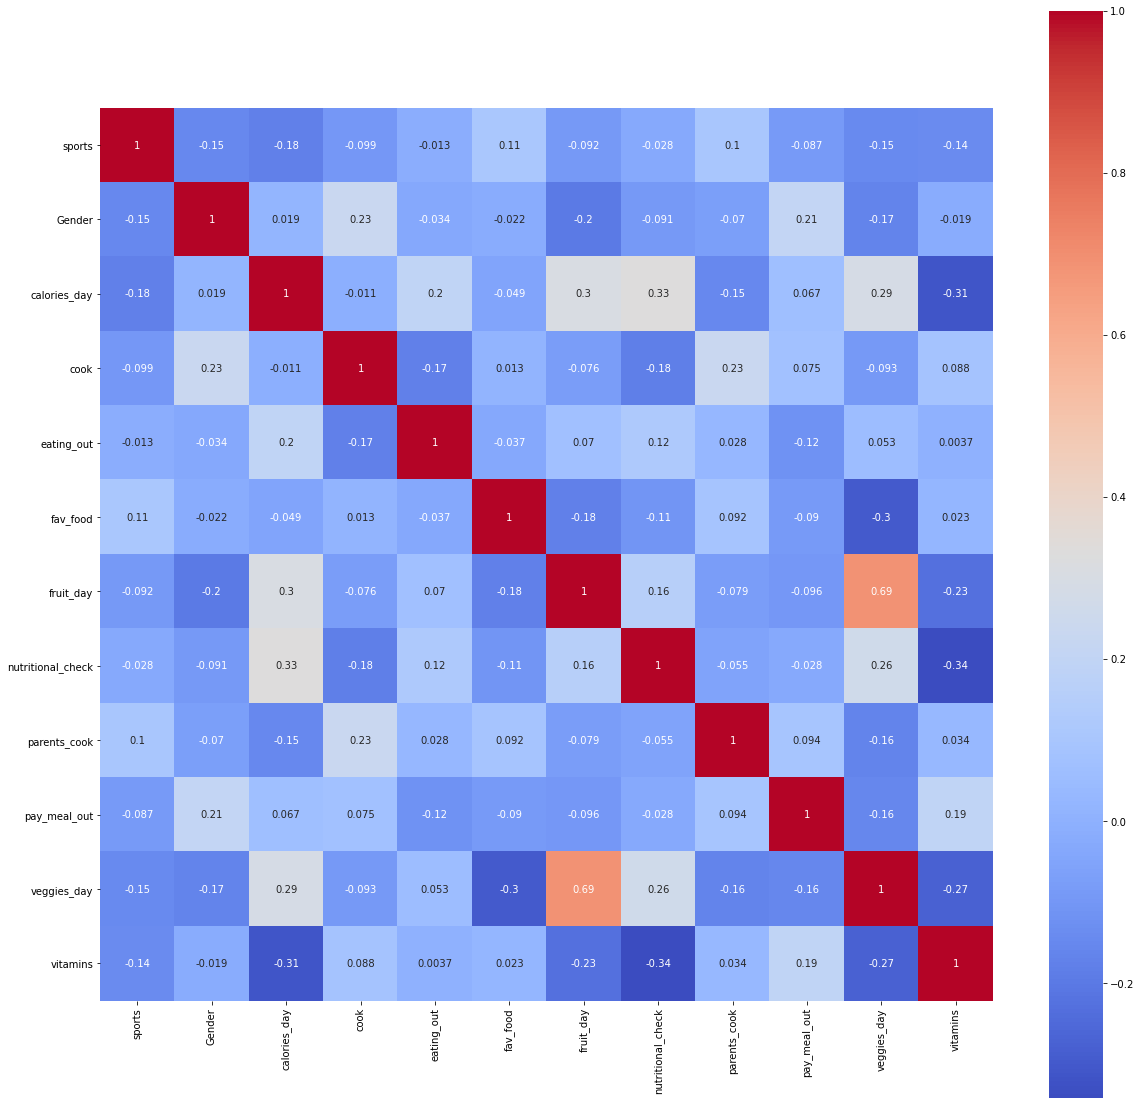

In [191]:
#計算correlation
#取特徵欄位
features_mean= list(train.columns)
# print(features_mean)

plt.figure(figsize=(20,20))
sns.heatmap(train[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [192]:
from sklearn.model_selection import train_test_split
y = train["sports"].values
X = train.drop(["sports"], axis=1).values
#切分訓練與驗證資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('train dataset: {0}; test dataset: {1}'.format(X_train.shape, X_test.shape))

train dataset: (80, 11); test dataset: (21, 11)


In [193]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 1.0; test score: 0.5238095238095238


best param: 6; best score: 0.6666666666666666


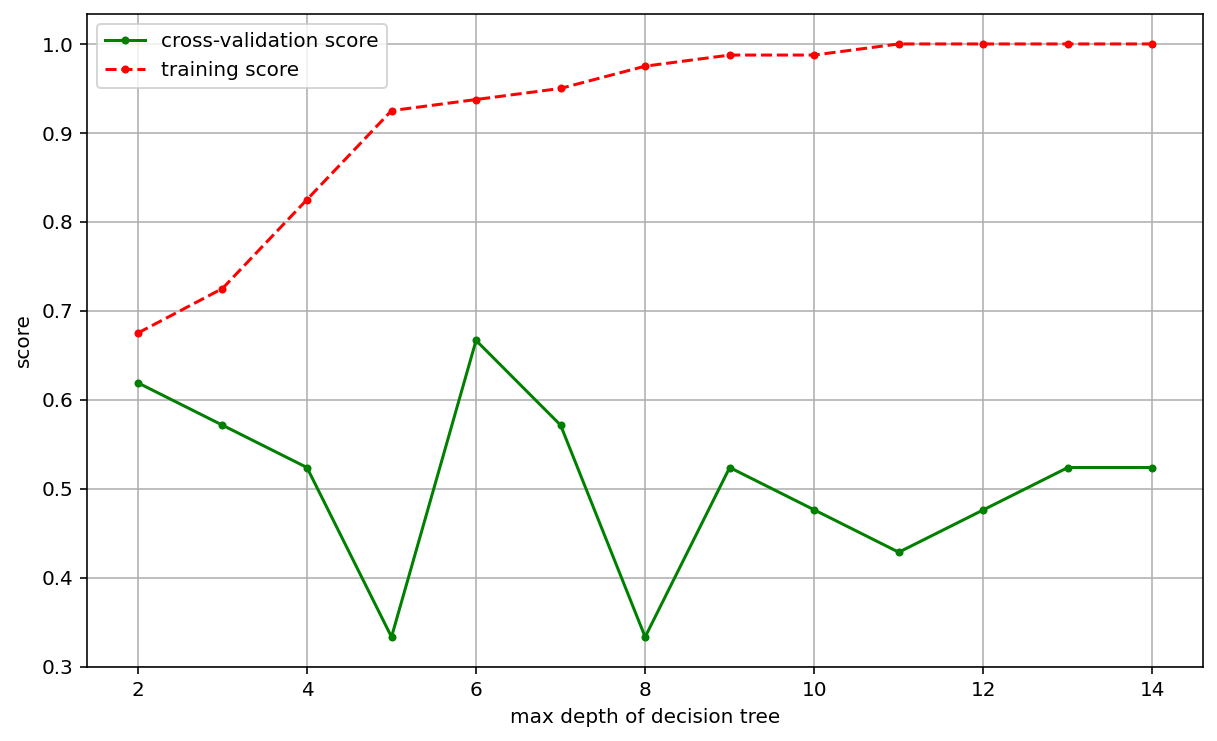

In [194]:
from sklearn.tree import DecisionTreeClassifier

#調整參數max_depth
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

#設定深度2~15
depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

#找出驗證資料集分數最高的索引
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
#列印最好的參數
print('best param: {0}; best score: {1}'.format(best_param, best_score))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()

best param: 0.4897959183673469; best score: 0.7142857142857143


C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

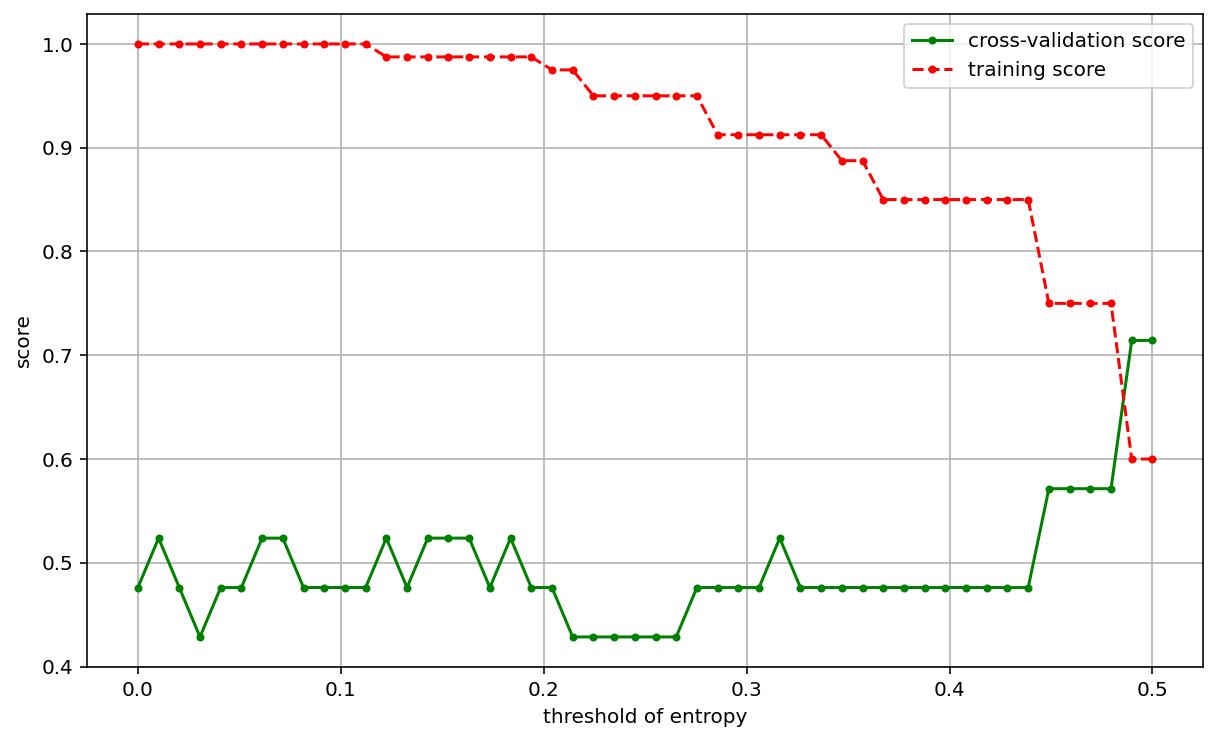

In [195]:
#利用基尼不純度
#設定閥值參數(min_impurity_split)，當information gain低於這個閥值時，則不進行分歧
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_split=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 指定閥值範圍
values = np.linspace(0, 0.5, 50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出分數最高的參數
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 畫圖
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

In [196]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

best param: {'min_impurity_split': 0.47959183673469385}
best score: 0.6237745098039217


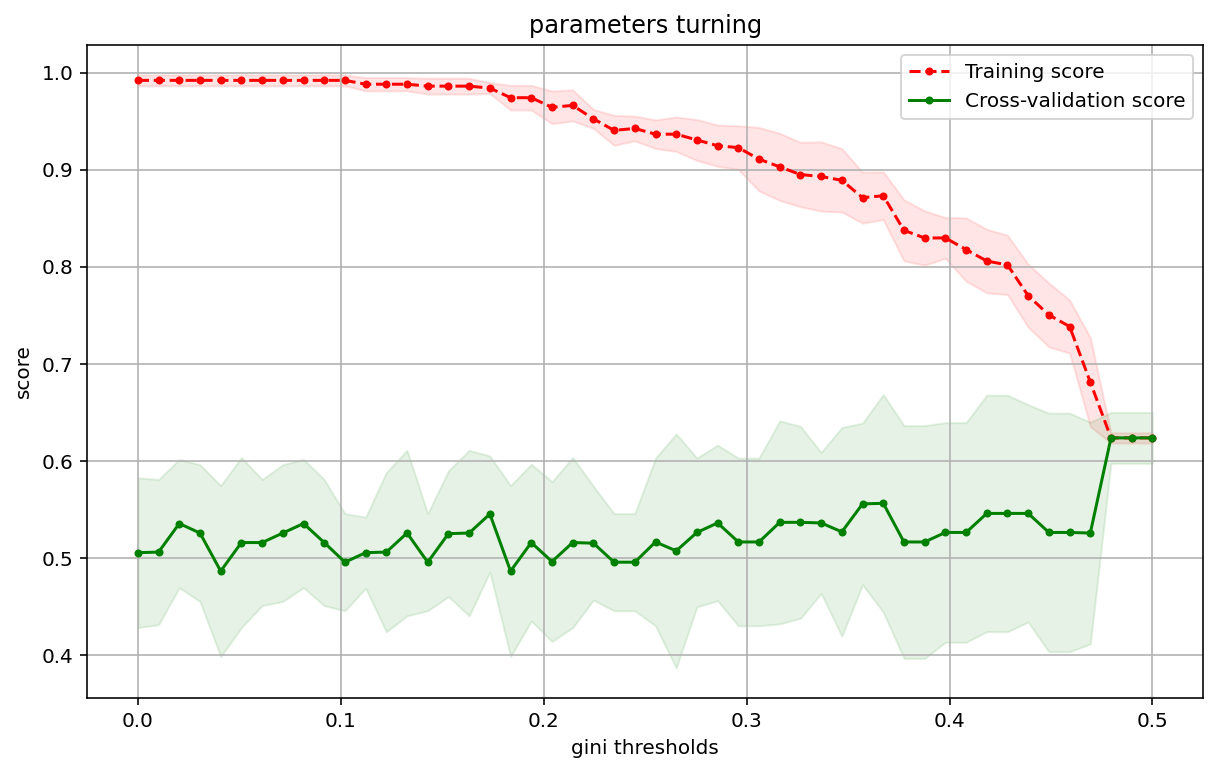

In [197]:
#透過GridSearchCV進行
#優點: 1. 內建交驗驗證，讓資料樣本穩定 2. 可以同時設定多個參數
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.5, 50)
param_grid = {'min_impurity_split': thresholds}

#每次計算時，都把資料切成5份，拿其中一份做為交叉驗證資料集，其他做為訓練資料集
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=6, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

In [198]:
#進行多個參數設定
from sklearn.model_selection import GridSearchCV

entropy_thresholds = np.linspace(0, 1, 50)
gini_thresholds = np.linspace(0, 0.5, 50)

#ID3
param_grid = [{'criterion': ['entropy'], 
               'min_impurity_split': entropy_thresholds},
              {'criterion': ['gini'], 
               'min_impurity_split': gini_thresholds},
              {'max_depth': range(2, 10)},
              {'min_samples_split': range(2, 30, 2)}]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=6)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

best param: {'criterion': 'entropy', 'min_impurity_split': 0.9591836734693877}
best score: 0.6237745098039217


C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


In [203]:
clf = DecisionTreeClassifier(criterion='entropy', min_impurity_split=0.47959183673469385)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

from sklearn import tree

with open("Decision_Tree/Sports_混淆矩陣.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

train score: 0.9875; test score: 0.6190476190476191


C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


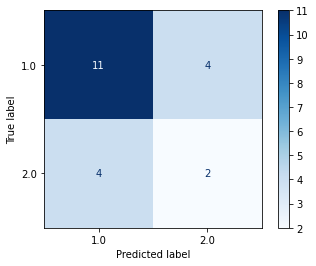

In [204]:
from sklearn import metrics

pred_test_y = clf.predict(X_test)
metrics.plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
plt.grid(False)